In [1]:
import findspark

findspark.init()
findspark.find()

'/usr/lib/spark'

In [2]:
import pyspark

In [3]:
!hdfs dfs -ls /

Found 4 items
drwx------   - mapred hadoop          0 2023-11-07 17:55 /hadoop
drwxrwxrwt   - hdfs   hadoop          0 2023-11-07 17:56 /tmp
drwxrwxrwt   - hdfs   hadoop          0 2023-11-07 17:55 /user
drwxrwxrwt   - hdfs   hadoop          0 2023-11-07 17:56 /var


In [4]:
!hadoop distcp s3a://mlops-otus-task2/* /user/data/

2023-11-07 19:56:02,219 INFO tools.DistCp: Input Options: DistCpOptions{atomicCommit=false, syncFolder=false, deleteMissing=false, ignoreFailures=false, overwrite=false, append=false, useDiff=false, useRdiff=false, fromSnapshot=null, toSnapshot=null, skipCRC=false, blocking=true, numListstatusThreads=0, maxMaps=20, mapBandwidth=0.0, copyStrategy='uniformsize', preserveStatus=[], atomicWorkPath=null, logPath=null, sourceFileListing=null, sourcePaths=[s3a://mlops-otus-task2/*], targetPath=/user/data, filtersFile='null', blocksPerChunk=0, copyBufferSize=8192, verboseLog=false, directWrite=false}, sourcePaths=[s3a://mlops-otus-task2/*], targetPathExists=false, preserveRawXattrsfalse
2023-11-07 19:56:02,445 INFO client.RMProxy: Connecting to ResourceManager at rc1a-dataproc-m-fhuo5de5fwir5dk0.mdb.yandexcloud.net/10.128.0.9:8032
2023-11-07 19:56:02,560 INFO client.AHSProxy: Connecting to Application History server at rc1a-dataproc-m-fhuo5de5fwir5dk0.mdb.yandexcloud.net/10.128.0.9:10200
2023-

# Загрузка данных

In [10]:
import findspark

findspark.init()
findspark.find()

from pyspark.sql import SparkSession

spark = (
    SparkSession.builder.appName("OTUS")
    .config("spark.dynamicAllocation.enabled", "true")
    .config("spark.executor.memory", "4g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

In [11]:
from pyspark.sql import functions as f

data = spark.read.text("/user/data/2019-09-21.txt")

name_cols = [
    "tranaction_id",
    "tx_datetime",
    "customer_id",
    "terminal_id",
    "tx_amount",
    "tx_time_seconds",
    "tx_time_days",
    "tx_fraud",
    "tx_fraud_scenario",
]

data = (
    data.withColumn("temp", f.split("value", ","))
    .select(
        *(
            f.col("temp").getItem(i).alias(name_col)
            for i, name_col in enumerate(name_cols)
        )
    )
    .filter(f.col("tx_datetime").isNotNull())
)

In [13]:
# To count the total rows in the dataframe.

print("Number of rows: \t", data.count())


# Number of columns can be counted in this way

print("Number of columns: \t", len(data.columns))


# To view the names of the columns

print("\nName of columns: \n", data.columns)

Number of rows: 	 46994586
Number of columns: 	 9

Name of columns: 
 ['tranaction_id', 'tx_datetime', 'customer_id', 'terminal_id', 'tx_amount', 'tx_time_seconds', 'tx_time_days', 'tx_fraud', 'tx_fraud_scenario']


In [16]:
# Descriptive statistics of the datafrmae

data.describe().toPandas()

,summary,tranaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud,tx_fraud_scenario
0,count,46994586,46994586,46994586,46994586,46994586,46994586,46994586,46994586,46994586
1,mean,7.04855295E7,None,500408.7910296518,26131.415391065988,54.23517020109595,3887961.7464464735,44.499569929182904,0.057127133751109116,0.11508919346581753
2,stddev,1.356616858311507E7,None,288605.71890121,1514438.6991362153,41.309001673721376,748103.2080479839,8.656042958590003,0.2320853840435848,0.46959559949215074
3,min,46988237,2019-09-21 00:00:00,-999999,,0.00,2592000,30,0,0
4,max,93982822,2019-10-20 24:00:00,999999,999,999.92,5184000,59,1,3


In [17]:
data.summary().toPandas()

,summary,tranaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud,tx_fraud_scenario
0,count,46994586,46994586,46994586,46994586,46994586,46994586,46994586,46994586,46994586
1,mean,7.04855295E7,None,500408.7910296518,26131.415391065988,54.23517020109512,3887961.7464464735,44.499569929182904,0.057127133751109116,0.11508919346581753
2,stddev,1.3566168583115077E7,None,288605.71890120825,1514438.699136217,41.30900167372155,748103.2080479461,8.656042958589087,0.23208538404358592,0.46959559949214885
3,min,46988237,2019-09-21 00:00:00,-999999,,0.00,2592000,30,0,0
4,25%,5.8733462E7,None,250697.0,197.0,21.94,3239860.0,37.0,0.0,0.0
5,50%,7.0484855E7,None,500713.0,511.0,45.42,3886987.0,44.0,0.0,0.0
6,75%,8.2235879E7,None,750209.0,797.0,77.81,4535958.0,52.0,0.0,0.0
7,max,93982822,2019-10-20 24:00:00,999999,999,999.92,5184000,59,1,3


## transaction_id

In [27]:
# проверим, что все transaction_id уникальны

data.select("tranaction_id").distinct().count()

46994586

In [ ]:
num_rows = 46994586

Действительно, все уникальны, это хорошо.

## tx_time_days и tx_time_seconds

In [43]:
# проверим, что они везде совпадают после перевода

data_1 = data.withColumn(
    "days_in_seconds", f.floor(data["tx_time_seconds"] / 60 / 60 / 24)
)
data_2 = data_1.withColumn(
    "equality", data_1["tx_time_days"] == data_1["days_in_seconds"]
)

In [45]:
data_2.groupBy("equality").count().show()

+--------+--------+
|equality|   count|
+--------+--------+
|    true|46994483|
|   false|     103|
+--------+--------+



Видим, что есть где-то несовпадения, посмотрим на них

In [47]:
data_2.select(["tx_time_seconds", "tx_time_days", "days_in_seconds", "equality"]).where(
    f.col("equality") == False
).show()

+---------------+------------+---------------+--------+
|tx_time_seconds|tx_time_days|days_in_seconds|equality|
+---------------+------------+---------------+--------+
|        2678400|          30|             31|   false|
|        2678400|          30|             31|   false|
|        2764800|          31|             32|   false|
|        2764800|          31|             32|   false|
|        2851200|          32|             33|   false|
|        2851200|          32|             33|   false|
|        2937600|          33|             34|   false|
|        3024000|          34|             35|   false|
|        3024000|          34|             35|   false|
|        3024000|          34|             35|   false|
|        3110400|          35|             36|   false|
|        3110400|          35|             36|   false|
|        3110400|          35|             36|   false|
|        3110400|          35|             36|   false|
|        3196800|          36|             37|  

Что-то странное, по секундам видно, что 2678400 - это ровно 31 день, как и все остальные - это ровно число дней. Видимо, в формуле при пересчете на дни было строгое неравество при какой-то проверке, из-за этого странное округление произошло. 
Нужно это подправить в дальнейшем.

Оценить, сколько всего таких значений можно так - у нас 40 файлов, в нашем файле 100 таких помарок, поэтому примерно 4к таких помарок по всему датасету.

## customer_id
Уже сейчас можно видеть проблемы: как мы видим, кажется, что в customer_id могут быть только целые положительные числа, здесь мы видим минимальное значение отрицательное. Думаю, что так описывали неизвестные customer_id, чтобы не оставлять пропуски. Давайте проверим это.

In [6]:
# Возьмем 100_000 для проверки
customer_id_100_000 = data.limit(100_000).select("customer_id").toPandas()
customer_id_100_000["customer_id"] = customer_id_100_000["customer_id"].apply(
    lambda x: int(x)
)

In [15]:
customer_id_100_000["greater_0"] = customer_id_100_000["customer_id"].apply(
    lambda x: x > 0
)
customer_id_100_000["greater_0"].value_counts()

True     99998
False        2
Name: greater_0, dtype: int64

In [16]:
customer_id_100_000[customer_id_100_000["customer_id"] < 0]

,customer_id,greater_0
21110,-999999,False
90767,-999999,False


Видим, что такие значения говорят нам о том, что это заполненные таким образом пустые клетки.

In [21]:
# Посмотрим на количество таких данные
count_none_customer_id = (
    data.select("customer_id").where(f.col("customer_id") < 0).count()
)
num_rows = 46994586
print(
    f"Процент none значений в customer_id {count_none_customer_id / num_rows * 100:.4f}"
)
print(
    f"На каждые {num_rows // count_none_customer_id} транзакций приходится 1 с неизвестным customer_id"
)

Процент none значений в customer_id 0.0008
На каждые 125318 транзакций приходится 1 с неизвестным customer_id


Тем самым у нас 40 файлов по примерно 50M записей каждый -> 16к значений none будет во всех данных по колонке customer_id.

Также появилось предположение, что если нам неизвестен customer_id - то скорее всего действовал мошенник, которые скрыл информацию о себе. Проверим.

In [4]:
none_customer_id = (
    data.select(["customer_id", "tx_fraud_scenario"])
    .where(f.col("customer_id") < 0)
    .toPandas()
)

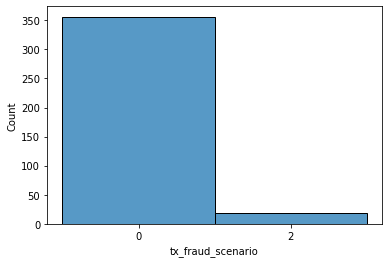

In [10]:
import seaborn as sns

sns.histplot(none_customer_id, x="tx_fraud_scenario")

Как видим, предположение оказалось ложным - это действительно скорее всего просто None

# tx_amount
Видим по той же таблице, что максимальное значение очень велико, хотя в остальном распределение расположено в пределах 30-70 уе, а максимум - 999.92. Это явные выбросы, которые не стоит оставлять в данных. Их нужно будет также убрать.

In [23]:
count_more_100_tx_amount = (
    data.select("tx_amount").where(f.col("tx_amount") > 100).count()
)
print(
    f"Процент транзакций, в которых tx_amount > 100 - {count_more_100_tx_amount / num_rows * 100:.4f}"
)

Процент транзакций, в которых tx_amount > 100 - 13.4865


Процент довольно большой. Думаю, что нужно посмотреть, как связаны tx_amount и tx_froud.

## terminal_id
Также по саммари мы видим, что для terminal_id минимальное значение '', которое по факту опять означает пропущенное значение.

In [13]:
# Посмотрим на количество таких данные
count_none_terminal_id = (
    data.select("terminal_id").where(f.col("terminal_id") == "").count()
)
num_rows = 46994586
print(
    f"Процент none значений в terminal_id {count_none_terminal_id / num_rows * 100:.4f}"
)
print(
    f"На каждые {num_rows // count_none_terminal_id} транзакций приходится 1 с неизвестным terminal_id"
)

Процент none значений в terminal_id 0.0017
На каждые 60404 транзакций приходится 1 с неизвестным terminal_id


Примерно в два раза больше, чем в customer_id

## Визуальный поиск зависимостей

In [11]:
data_1procent = data.sample(False, 0.01, seed=0).toPandas()

In [5]:
data_1procent.head(5)

,tranaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud,tx_fraud_scenario
0,46988246,2019-09-21 07:57:03,12,522,77.39,2620623,30,0,0
1,46988407,2019-09-21 08:11:23,112,714,103.78,2621483,30,0,0
2,46988488,2019-09-21 11:08:50,161,981,59.47,2632130,30,0,0
3,46988646,2019-09-21 01:44:59,280,35,50.02,2598299,30,0,0
4,46988658,2019-09-21 14:03:56,286,0,3.77,2642636,30,0,0


In [6]:
# заполним пока что '' в terminal_id как -1
data_1procent.loc[data_1procent["terminal_id"] == "", "terminal_id"] = -1

In [7]:
# Здесь покажем, какие нужно также сделать преобразования с данными
data_1procent["tranaction_id"] = data_1procent["tranaction_id"].astype(int)
data_1procent["customer_id"] = data_1procent["customer_id"].astype(int)
data_1procent["terminal_id"] = data_1procent["terminal_id"].astype(int)
data_1procent["tx_amount"] = data_1procent["tx_amount"].astype(float)
data_1procent["tx_time_seconds"] = data_1procent["tx_time_seconds"].astype(int)
data_1procent["tx_time_days"] = data_1procent["tx_time_days"].astype(int)
data_1procent["tx_fraud"] = data_1procent["tx_fraud"].astype(int)
data_1procent["tx_fraud_scenario"] = data_1procent["tx_fraud_scenario"].astype(int)

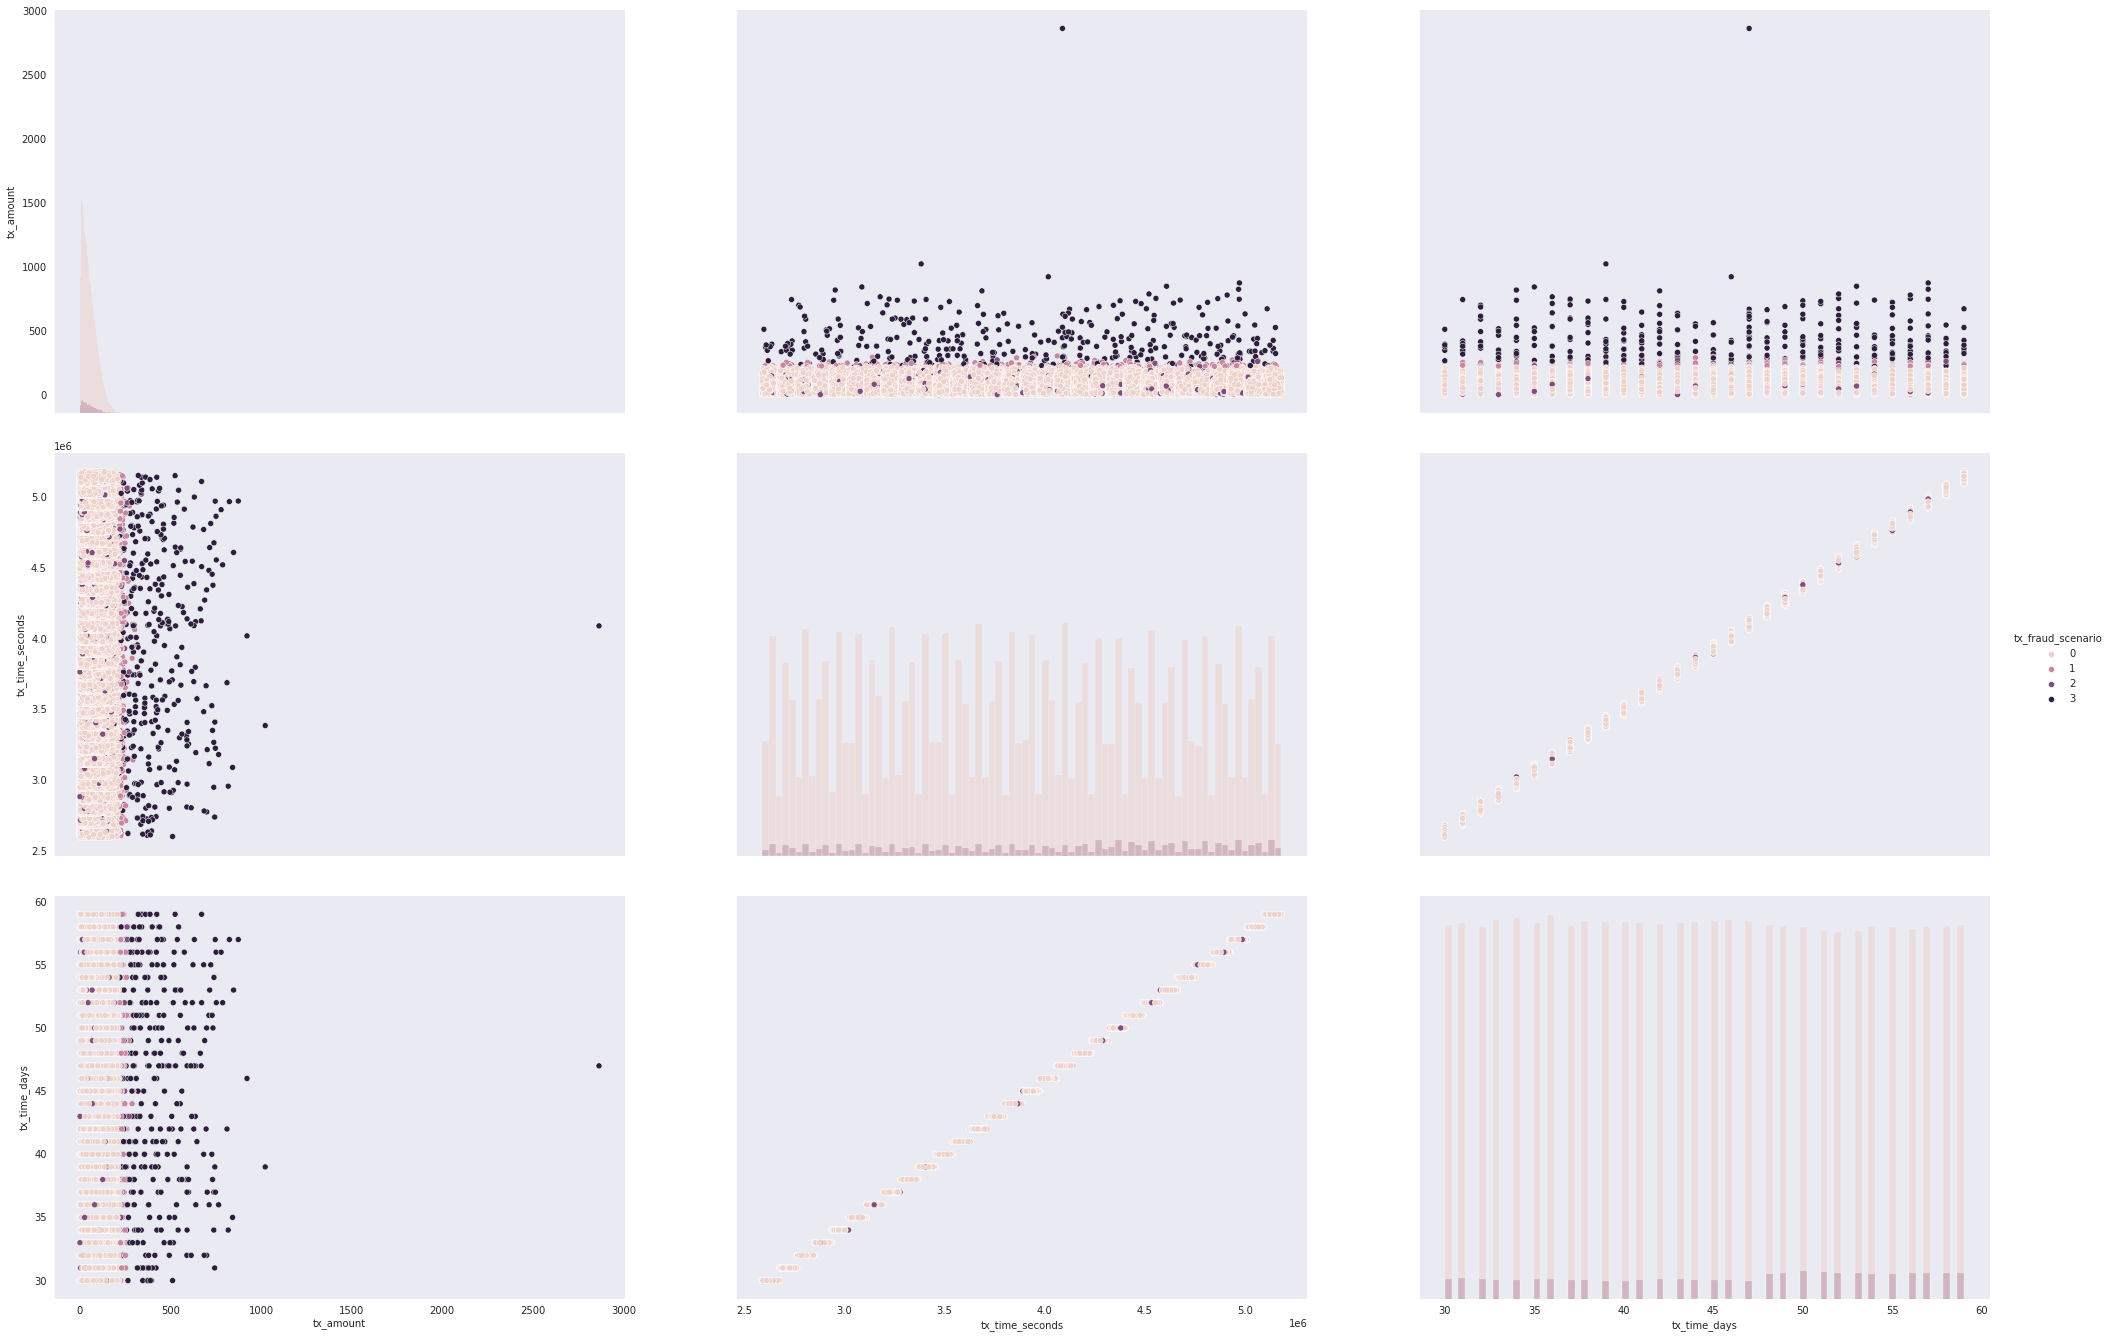

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style("dark"):
    g = sns.PairGrid(
        data_1procent[
            ["tx_amount", "tx_time_seconds", "tx_time_days", "tx_fraud_scenario"]
        ],
        hue="tx_fraud_scenario",
    )
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot)
    g.fig.set_size_inches(30, 20)
    g.add_legend()

Но из того, что есть можно сразу заметить, что нет зависимости tx_time_seconds и tx_time_days от tx_amounth. Но видна явная зависимость tx_amount от tx_fraud_scenario, а значит и от tx_fraud - от увеличения tx_fraud мы видим, что tx_amount возрастает. Скорее всего tx_fraud_scenario - это как раз и есть категориальная переменная, отвечающая за тяжесть мошенничества: 0 - нет мошенничества, c 1 по 3 возрастающая по tx_amount тяжесть.

In [25]:
# проверим, что действительно 0 - нет мошеничества
data_1procent.groupby(["tx_fraud_scenario", "tx_fraud"]).count()

,,tranaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
tx_fraud_scenario,tx_fraud,,,,,,,
0,0,442423,442423,442423,442423,442423,442423,442423
1,1,245,245,245,245,245,245,245
2,1,25924,25924,25924,25924,25924,25924,25924
3,1,635,635,635,635,635,635,635


In [26]:
data_1procent[data_1procent["tx_amount"] == 0]

,tranaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud,tx_fraud_scenario
48229,51847872,2019-09-24 16:33:32,100298,943,0.0,2910812,33,1,2
52311,52250322,2019-09-24 18:06:39,357155,81,0.0,2916399,33,0,0
90914,56119032,2019-09-26 21:56:29,827813,807,0.0,3102989,35,0,0
93802,56402134,2019-09-27 18:51:34,8759,639,0.0,3178294,36,0,0
140123,61027416,2019-09-29 11:35:04,961612,669,0.0,3324904,38,0,0
199771,67021061,2019-10-03 15:58:56,789056,580,0.0,3686336,42,0,0
257514,72811890,2019-10-07 14:24:27,485026,573,0.0,4026267,46,0,0
281208,75175462,2019-10-08 10:39:05,992973,522,0.0,4099145,47,0,0
305891,77641261,2019-10-10 13:42:00,569387,2,0.0,4282920,49,0,0
346086,81647898,2019-10-13 05:52:19,125925,342,0.0,4513939,52,0,0


Эти транзакции на 0 у.е. тоже показались мне странными, но как-то описать это не могу адекватно. Возможно, стоит такие вещи просто выкинуть. Никогда не видел транзакции на 0 у.е., но скорее всего здесь проблема в точности.

In [49]:
data_1procent[data_1procent["tx_amount"] < 1]

,tranaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud,tx_fraud_scenario
27,46991761,2019-09-21 14:23:45,2302,511,0.87,2643825,30,0,0
127,47001630,2019-09-21 15:37:38,8678,164,0.70,2648258,30,0,0
1347,47126031,2019-09-21 13:21:59,87790,248,0.22,2640119,30,0,0
1483,47141648,2019-09-21 12:54:11,97914,248,0.81,2638451,30,0,0
1520,47144549,2019-09-21 08:56:11,99750,678,0.67,2624171,30,0,0
...,...,...,...,...,...,...,...,...,...
467713,93841624,2019-10-20 11:52:37,909942,313,0.02,5140357,59,0,0
467731,93843719,2019-10-20 18:28:00,911250,0,0.07,5164080,59,0,0
468160,93882442,2019-10-20 14:16:14,936031,994,0.89,5148974,59,0,0
468527,93918305,2019-10-20 17:50:06,958718,722,0.96,5161806,59,0,0


Да, видимо проблема действительно в точности. Возможно, стоит добавить для таких элементов минимальную сумму, чтобы не было просто 0. В файле кстати тоже такая точность, поэтому проблема не в моей загрузке.

/opt/conda/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


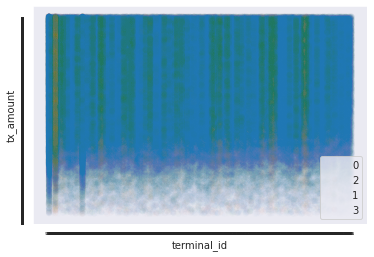

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style("dark"):
    sns.scatterplot(
        data=data_1procent[["tx_amount", "terminal_id", "tx_fraud_scenario"]],
        x="terminal_id",
        y="tx_amount",
        hue="tx_fraud_scenario",
        alpha=0.01,
    )
    plt.xticks(size=3)
    plt.yticks(rotation=90, size=3)
    plt.legend()

График получился хоть и плохой, но все же мы можем увидеть зависимость - явные линие НЕ синего цвета (любой цвет кроме синего - мошенничество) соответствуют каким-то конкретным терминалам.

Скорее всего то же самое можно видеть и для customer_id.

## Создание скрипта обработки данных

### Этапе предобработки:
1) Уберем сильно коррелирующие колонки
    - удалим tx_fraud - т.к. по tx_fraud_scenario оно полностью восстанавливается
    - удалим tx_time_days - во-первых, полностью восстанавливается из tx_time_seconds, во-вторых содержит меньше информации, чем tx_time_seconds(округление), в-третьих, содержит неточности, которые описал выше.
2) Подправим типы, а также название колонки tranaction_id (вроде во всех датасетах неверно написано)
3) Удаление выбросов
    - удалим все строчки с customer_id = -999999, потому что заменять самым популярным по tx_fraud_scenario нет смысла, ведь это id-шники.
    - уберем выбросы в tx_amount по 0.95-квантилю, а также все же уберем нули по 0.05-квантилю.
    - удалить строчки с terminal_id = ''

Реализацию можно найти в файле src/clear_data/clear_data.py

In [1]:
%load_ext autoreload
%autoreload 2

import sys
if "../afsbo" not in sys.path:
    sys.path.insert(0, "../")
    sys.path.insert(0, "../afsbo/")

from afsbo.clear_data.clear_data import (
    load_spark_dataset,
    clear_data
)

In [2]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder.appName("OTUS")
    .config("spark.dynamicAllocation.enabled", "true")
    .config("spark.executor.memory", "4g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

dataset = load_spark_dataset(spark, "/user/data/2019-09-21.txt")

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/lib/spark/jars/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/lib/hadoop/lib/slf4j-log4j12-1.7.25.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2023-11-07 21:26:47,683 WARN util.Utils: spark.executor.instances less than spark.dynamicAllocation.minExecutors is invalid, ignoring its setting, please update your configs.
2023-11-07 21:26:52,649 WARN util.Utils: spark.executor.instances less than spark.dynamicAllocation.minExecutors is invalid, ignoring its setting, please update your configs.


In [5]:
dataset.count()

46994586

In [10]:
dataset

DataFrame[tranaction_id: string, tx_datetime: string, customer_id: string, terminal_id: string, tx_amount: string, tx_time_seconds: string, tx_time_days: string, tx_fraud: string, tx_fraud_scenario: string]

In [6]:
dataset.show()

+-------------+-------------------+-----------+-----------+---------+---------------+------------+--------+-----------------+
|tranaction_id|        tx_datetime|customer_id|terminal_id|tx_amount|tx_time_seconds|tx_time_days|tx_fraud|tx_fraud_scenario|
+-------------+-------------------+-----------+-----------+---------+---------------+------------+--------+-----------------+
|     46988237|2019-09-21 09:45:59|          1|        178|    83.11|        2627159|          30|       0|                0|
|     46988238|2019-09-21 19:33:01|          2|        660|    22.15|        2662381|          30|       0|                0|
|     46988239|2019-09-21 18:06:19|          3|        732|    36.83|        2657179|          30|       0|                0|
|     46988240|2019-09-21 16:56:01|         10|        663|    19.30|        2652961|          30|       0|                0|
|     46988241|2019-09-21 05:34:26|         10|        145|   106.51|        2612066|          30|       0|           

In [3]:
clear_dataset = clear_data(dataset)

In [4]:
clear_dataset.count()

46993433

In [8]:
clear_dataset

DataFrame[tx_datetime: timestamp, customer_id: int, terminal_id: int, tx_amount: double, tx_time_seconds: int, tx_fraud_scenario: smallint, transaction_id: int]

In [9]:
clear_dataset.show()

+-------------------+-----------+-----------+---------+---------------+-----------------+--------------+
|        tx_datetime|customer_id|terminal_id|tx_amount|tx_time_seconds|tx_fraud_scenario|transaction_id|
+-------------------+-----------+-----------+---------+---------------+-----------------+--------------+
|2019-09-21 09:45:59|          1|        178|    83.11|        2627159|                0|      46988237|
|2019-09-21 19:33:01|          2|        660|    22.15|        2662381|                0|      46988238|
|2019-09-21 18:06:19|          3|        732|    36.83|        2657179|                0|      46988239|
|2019-09-21 16:56:01|         10|        663|     19.3|        2652961|                0|      46988240|
|2019-09-21 05:34:26|         10|        145|   106.51|        2612066|                0|      46988241|
|2019-09-21 12:12:51|         11|        337|    53.97|        2635971|                0|      46988242|
|2019-09-21 11:05:32|         11|        973|     29.3|

Как видим, скрипт работает: выбросы убраны (количество строк), типы изменены. Время работы - примерно 1 минута на 50М записей.

## Обновление всего датасета + сохранение в бакете

In [11]:
from pathlib import Path

In [23]:
!hdfs dfs -ls /user/data >> datasets.txt

In [26]:
with open("datasets.txt", encoding="utf-8", mode="r") as file_:
    list_datasets_path = []
    for line in file_:
        list_datasets_path.extend(
            [obj.strip() for obj in line.split(" ") if obj.find("/user/data/") != -1]
        )

In [27]:
list_datasets_path

['/user/data/2019-08-22.txt',
 '/user/data/2019-09-21.txt',
 '/user/data/2019-10-21.txt',
 '/user/data/2019-11-20.txt',
 '/user/data/2019-12-20.txt',
 '/user/data/2020-01-19.txt',
 '/user/data/2020-02-18.txt',
 '/user/data/2020-03-19.txt',
 '/user/data/2020-04-18.txt',
 '/user/data/2020-05-18.txt',
 '/user/data/2020-06-17.txt',
 '/user/data/2020-07-17.txt',
 '/user/data/2020-08-16.txt',
 '/user/data/2020-09-15.txt',
 '/user/data/2020-10-15.txt',
 '/user/data/2020-11-14.txt',
 '/user/data/2020-12-14.txt',
 '/user/data/2021-01-13.txt',
 '/user/data/2021-02-12.txt',
 '/user/data/2021-03-14.txt',
 '/user/data/2021-04-13.txt',
 '/user/data/2021-05-13.txt',
 '/user/data/2021-06-12.txt',
 '/user/data/2021-07-12.txt',
 '/user/data/2021-08-11.txt',
 '/user/data/2021-09-10.txt',
 '/user/data/2021-10-10.txt',
 '/user/data/2021-11-09.txt',
 '/user/data/2021-12-09.txt',
 '/user/data/2022-01-08.txt',
 '/user/data/2022-02-07.txt',
 '/user/data/2022-03-09.txt',
 '/user/data/2022-04-08.txt',
 '/user/da

In [33]:
from tqdm import tqdm

save_dir = "/user/processed_data/"
for dataset_path in tqdm(list_datasets_path, total=len(list_datasets_path)):
    dataset = load_spark_dataset(spark, dataset_path)
    clean_dataset = clear_data(dataset)
    clean_dataset.write.parquet(
        save_dir + dataset_path.split("/")[-1][:-4] + ".parquet"
    )

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [1:28:47<00:00, 133.19s/it]                              


За полтора часа все отработало, осталось перенести все в s3.

In [34]:
!hadoop distcp /user/processed_data/* s3a://mlops-otus-task2/processed_data/

2023-11-07 23:14:48,812 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2023-11-07 23:14:48,871 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2023-11-07 23:14:48,871 INFO impl.MetricsSystemImpl: s3a-file-system metrics system started
2023-11-07 23:14:49,906 INFO tools.DistCp: Input Options: DistCpOptions{atomicCommit=false, syncFolder=false, deleteMissing=false, ignoreFailures=false, overwrite=false, append=false, useDiff=false, useRdiff=false, fromSnapshot=null, toSnapshot=null, skipCRC=false, blocking=true, numListstatusThreads=0, maxMaps=20, mapBandwidth=0.0, copyStrategy='uniformsize', preserveStatus=[], atomicWorkPath=null, logPath=null, sourceFileListing=null, sourcePaths=[/user/processed_data/*], targetPath=s3a://mlops-otus-task2/processed_data, filtersFile='null', blocksPerChunk=0, copyBufferSize=8192, verboseLog=false, directWrite=false}, sourcePaths=[/user/processed_data/*], targetPathExists=false, preserveRawXattrsf